# Mass Transports

Transport diagnostics for flow through major straits.

## Theory

Formally, mass transports are given by
$$T_x = \rho u  $$
$$T_y = \rho v  $$

Mass transports are diagnostics that are calculated online by the model:

|variable|long name|units|dimensions|
|-|
|tx_trans|T-cell i-mass transport|Sv|(time,st_ocean,xu_ocean,yt_ocean)|
|ty_trans|T-cell j-mass transport|Sv|(time,st_ocean,xt_ocean,yu_ocean)|


These variables are saved in `ocean.nc` files.

## Calculation

In [1]:
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import xarray as xr
import cmocean as cm
from dask.distributed import Client

import logging
logging.captureWarnings(True)
logging.getLogger('py.warnings').setLevel(logging.ERROR)

import sys, os

In [2]:
db = '/g/data3/hh5/tmp/cosima/database/access-om2.db'

In [4]:
## To implement, use:
## dask-scheduler
## dask-worker tcp://10.0.64.18:8786 --memory-limit 4e9 --nprocs 6 --nthreads 1 --local-directory /local/g40/amh157
#client = Client('tcp://10.0.64.22:8786', local_dir='/local/g40/amh157')
# simpler option:
client = Client(n_workers=4)
client

Client Scheduler: tcp://127.0.0.1:46183 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 8 Memory: 33.67 GB


In [3]:
xmin=-69.9
ymin=-71.6
ymax=-51.0

# Drake Passage Transport

01deg_jra55v13_ryf8485_spinup7
01deg_jra55v13_ryf8485_spinup9
01deg_jra55v13_ryf8485_spinup12


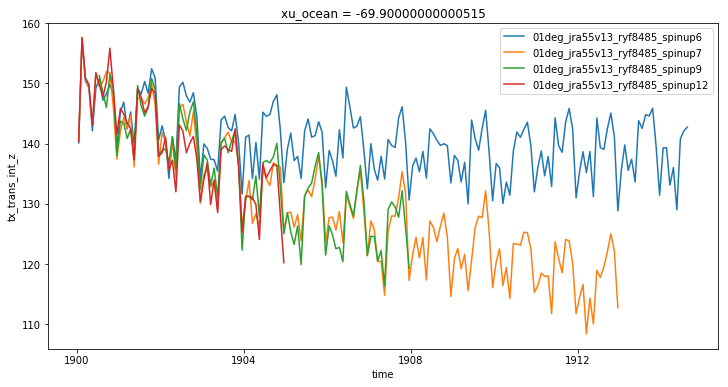

In [6]:
plt.figure(figsize=(12,6))
expt = '01deg_jra55v13_ryf8485_spinup6'
tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db,offset=693135,
                            time_units='days since 1900-01-01',n=150)
transport6 = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
transport6.plot(label=expt)


expt_list = ['01deg_jra55v13_ryf8485_spinup7',
             '01deg_jra55v13_ryf8485_spinup9',
             '01deg_jra55v13_ryf8485_spinup12']
for expt in expt_list:
    print(expt)
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label=expt)
plt.legend()


01deg_jra55v13_ryf8485_spinup6_newexe_highfreq
01deg_jra55v13_ryf8485_spinup6_newexe


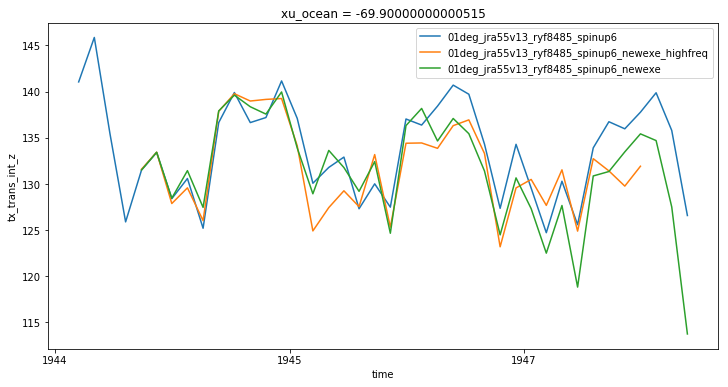

In [5]:
plt.figure(figsize=(12,6))
expt = '01deg_jra55v13_ryf8485_spinup6'
tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db,n=-20)
transport6 = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
transport6.plot(label=expt)


expt_list = [
             '01deg_jra55v13_ryf8485_spinup6_newexe_highfreq',
             '01deg_jra55v13_ryf8485_spinup6_newexe']
for expt in expt_list:
    print(expt)
    tx_trans = cc.querying.getvar(expt,'tx_trans_int_z',db)
    transport = tx_trans.sel(xu_ocean=xmin, method='nearest')\
                            .sel(yt_ocean=slice(ymin, ymax))\
                            .sum('yt_ocean')/1e6/1036
    transport.plot(label=expt)
plt.legend()

